# Spark

In [62]:
import numpy
import matplotlib.pyplot

from pyspark.sql.types import LongType
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, least, greatest, avg

spark = SparkSession.builder.getOrCreate()
df_departures = spark.read.csv('Données/Départs/Données.csv', header = True) # Date de dernière mise à jour des données : 17/02/2021
df_passengers = spark.read.csv('Données/Passagers/Données.csv', header = True) # Date de dernière mise à jour des données : 17/02/2021
df_freight = spark.read.csv('Données/Fret/Données.csv', header = True) # Date de dernière mise à jour des données : 17/02/2021
df_departures = df_departures.drop(df_departures._c65)
df_passengers = df_passengers.drop(df_passengers._c65)
df_freight = df_freight.drop(df_freight._c65)

for year in df_departures.columns[4:]:
    df_departures = df_departures.withColumn(year, df_departures[year].cast(LongType()))

for year in df_passengers.columns[4:]:
    df_passengers = df_passengers.withColumn(year, df_passengers[year].cast(LongType()))

for year in df_freight.columns[4:]:
    df_freight = df_freight.withColumn(year, df_freight[year].cast(LongType()))

df_departures = df_departures.fillna(0)
df_passengers = df_passengers.fillna(0)
df_freight = df_freight.fillna(0)
df_departures = df_departures.withColumn('Minimum', least(*[passengers for passengers in [col(year) for year in df_departures.columns[4:]]]))
df_passengers = df_passengers.withColumn('Minimum', least(*[passengers for passengers in [col(year) for year in df_passengers.columns[4:]]]))
df_freight = df_freight.withColumn('Minimum', least(*[passengers for passengers in [col(year) for year in df_freight.columns[4:]]]))
df_departures = df_departures.withColumn('Maximum', greatest(*[passengers for passengers in [col(year) for year in df_departures.columns[4:]]]))
df_passengers = df_passengers.withColumn('Maximum', greatest(*[passengers for passengers in [col(year) for year in df_passengers.columns[4:]]]))
df_freight = df_freight.withColumn('Maximum', greatest(*[passengers for passengers in [col(year) for year in df_freight.columns[4:]]]))
df_departures = df_departures.withColumn('Total', sum(passengers for passengers in [col(year) for year in df_departures.columns[4:]]))
df_passengers = df_passengers.withColumn('Total', sum(passengers for passengers in [col(year) for year in df_passengers.columns[4:]]))
df_freight = df_freight.withColumn('Total', sum(passengers for passengers in [col(year) for year in df_freight.columns[4:]]))
df_departures = df_departures.withColumn('Average', df_departures.Total / 61)
df_passengers = df_passengers.withColumn('Average', df_passengers.Total / 61)
df_freight = df_freight.withColumn('Average', df_freight.Total / 61)

In [151]:
df_departures.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Country code: string (nullable = true)
 |-- Indicator: string (nullable = true)
 |-- Indicator code: string (nullable = true)
 |-- 1960: long (nullable = true)
 |-- 1961: long (nullable = true)
 |-- 1962: long (nullable = true)
 |-- 1963: long (nullable = true)
 |-- 1964: long (nullable = true)
 |-- 1965: long (nullable = true)
 |-- 1966: long (nullable = true)
 |-- 1967: long (nullable = true)
 |-- 1968: long (nullable = true)
 |-- 1969: long (nullable = true)
 |-- 1970: long (nullable = true)
 |-- 1971: long (nullable = true)
 |-- 1972: long (nullable = true)
 |-- 1973: long (nullable = true)
 |-- 1974: long (nullable = true)
 |-- 1975: long (nullable = true)
 |-- 1976: long (nullable = true)
 |-- 1977: long (nullable = true)
 |-- 1978: long (nullable = true)
 |-- 1979: long (nullable = true)
 |-- 1980: long (nullable = true)
 |-- 1981: long (nullable = true)
 |-- 1982: long (nullable = true)
 |-- 1983: long (nullable = true)
 |-- 1984

In [152]:
df_passengers.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Country code: string (nullable = true)
 |-- Indicator: string (nullable = true)
 |-- Indicator code: string (nullable = true)
 |-- 1960: long (nullable = true)
 |-- 1961: long (nullable = true)
 |-- 1962: long (nullable = true)
 |-- 1963: long (nullable = true)
 |-- 1964: long (nullable = true)
 |-- 1965: long (nullable = true)
 |-- 1966: long (nullable = true)
 |-- 1967: long (nullable = true)
 |-- 1968: long (nullable = true)
 |-- 1969: long (nullable = true)
 |-- 1970: long (nullable = true)
 |-- 1971: long (nullable = true)
 |-- 1972: long (nullable = true)
 |-- 1973: long (nullable = true)
 |-- 1974: long (nullable = true)
 |-- 1975: long (nullable = true)
 |-- 1976: long (nullable = true)
 |-- 1977: long (nullable = true)
 |-- 1978: long (nullable = true)
 |-- 1979: long (nullable = true)
 |-- 1980: long (nullable = true)
 |-- 1981: long (nullable = true)
 |-- 1982: long (nullable = true)
 |-- 1983: long (nullable = true)
 |-- 1984

In [153]:
df_freight.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Country code: string (nullable = true)
 |-- Indicator: string (nullable = true)
 |-- Indicator code: string (nullable = true)
 |-- 1960: long (nullable = true)
 |-- 1961: long (nullable = true)
 |-- 1962: long (nullable = true)
 |-- 1963: long (nullable = true)
 |-- 1964: long (nullable = true)
 |-- 1965: long (nullable = true)
 |-- 1966: long (nullable = true)
 |-- 1967: long (nullable = true)
 |-- 1968: long (nullable = true)
 |-- 1969: long (nullable = true)
 |-- 1970: long (nullable = true)
 |-- 1971: long (nullable = true)
 |-- 1972: long (nullable = true)
 |-- 1973: long (nullable = true)
 |-- 1974: long (nullable = true)
 |-- 1975: long (nullable = true)
 |-- 1976: long (nullable = true)
 |-- 1977: long (nullable = true)
 |-- 1978: long (nullable = true)
 |-- 1979: long (nullable = true)
 |-- 1980: long (nullable = true)
 |-- 1981: long (nullable = true)
 |-- 1982: long (nullable = true)
 |-- 1983: long (nullable = true)
 |-- 1984

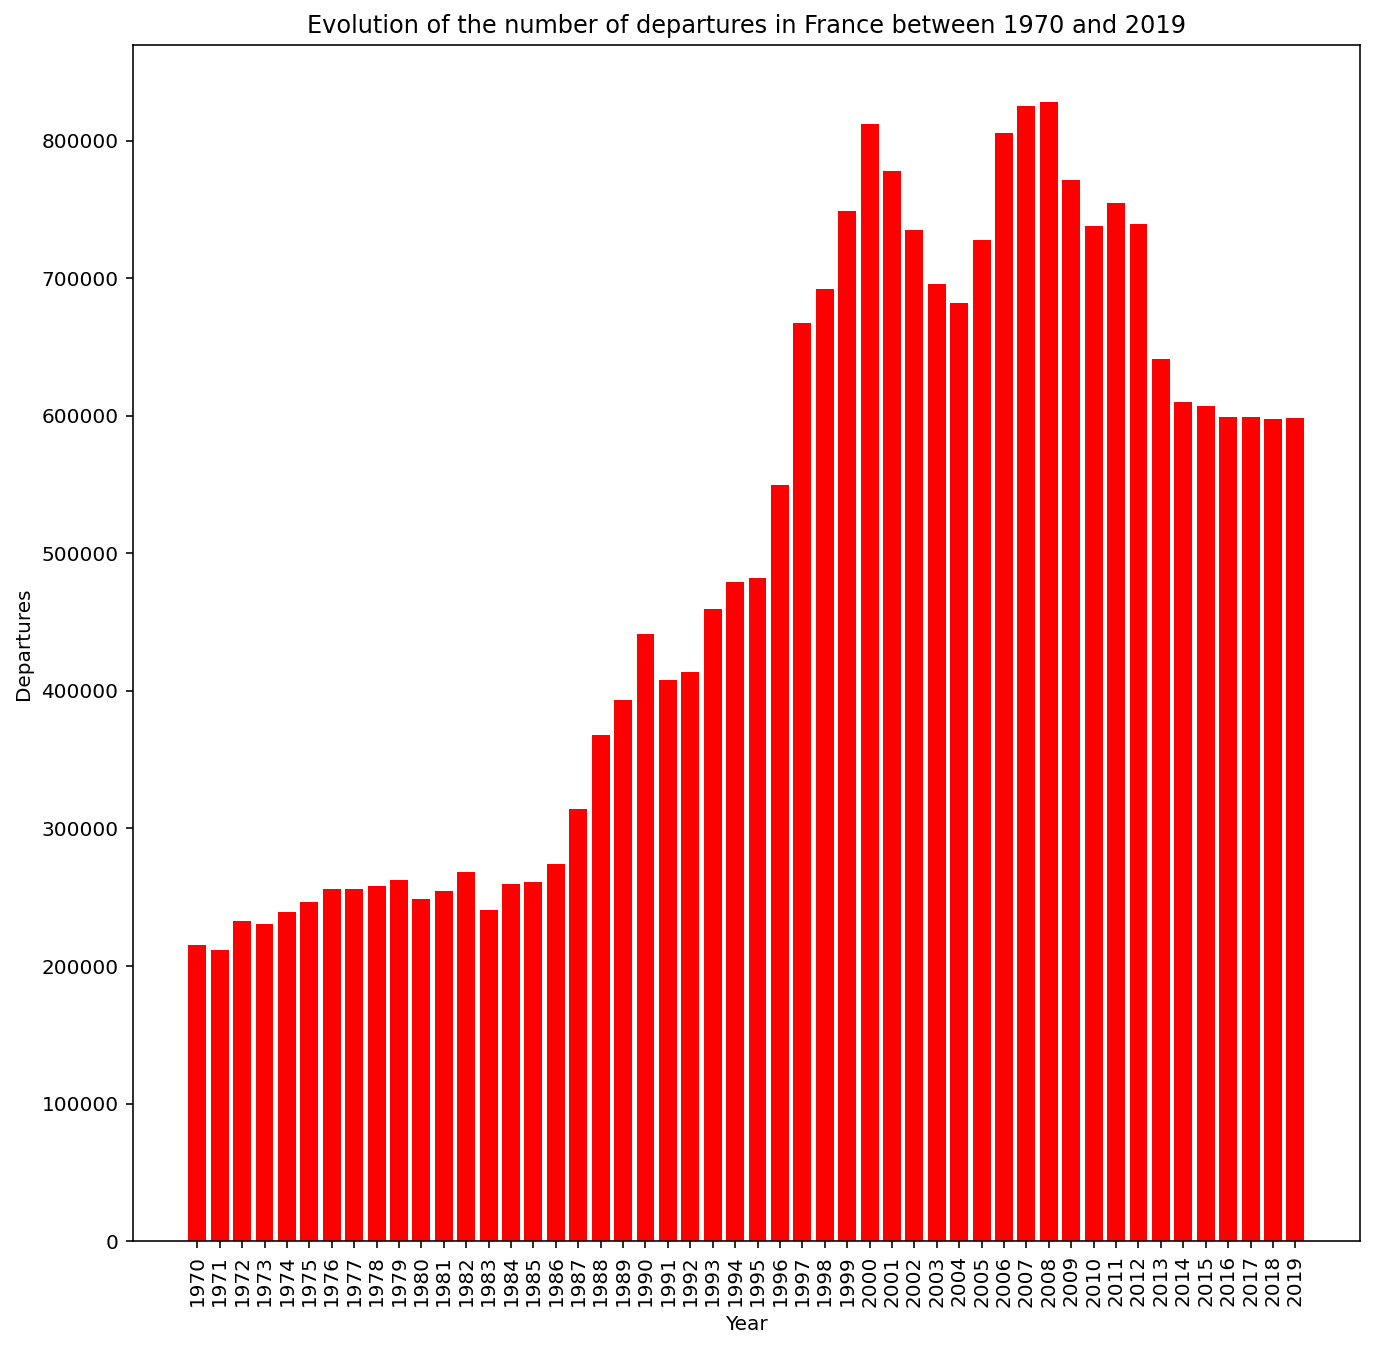

In [112]:
years = df_departures.columns[14:64]
departures = df_departures.filter(df_departures.Country == 'France').select(df_departures.columns[14:64]).collect()[0].asDict().values()

matplotlib.pyplot.gcf().set_size_inches(11, 11)
matplotlib.pyplot.title('Evolution of the number of departures in France between 1970 and 2019')
matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('Departures')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(years, departures, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Départs/France.png')

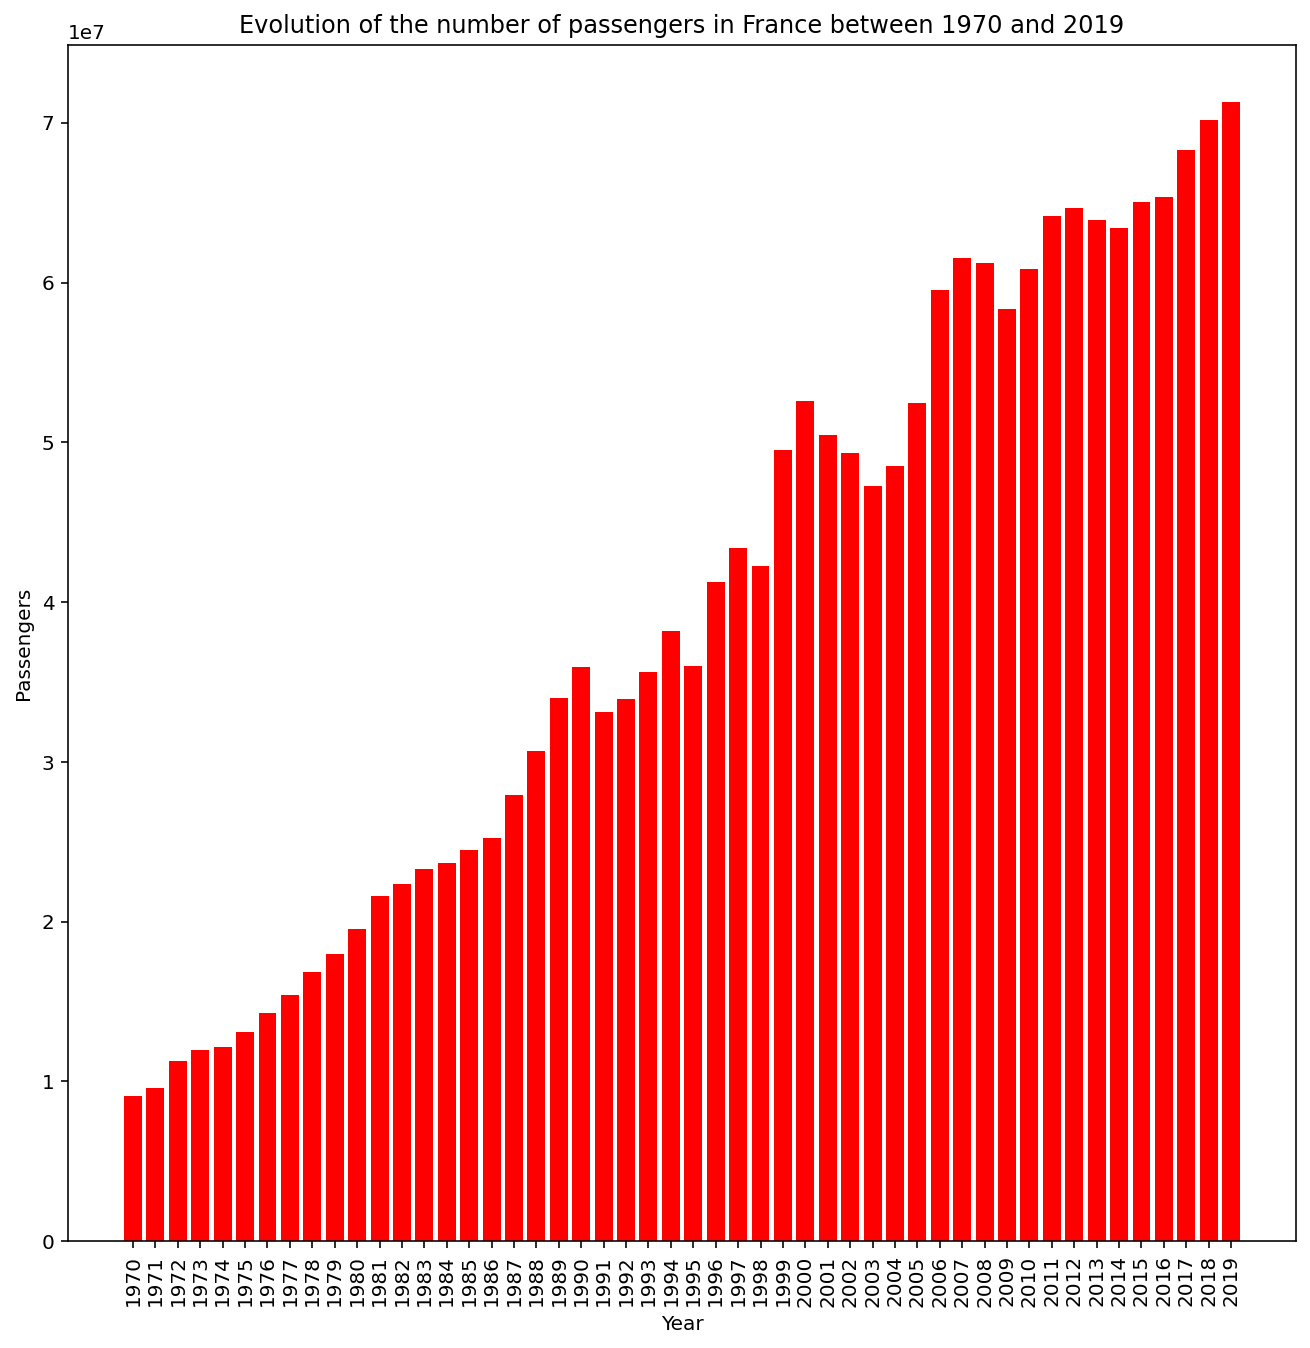

In [111]:
passengers = df_passengers.filter(df_passengers.Country == 'France').select(df_passengers.columns[14:64]).collect()[0].asDict().values()

matplotlib.pyplot.gcf().set_size_inches(11, 11)
matplotlib.pyplot.title('Evolution of the number of passengers in France between 1970 and 2019')
matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('Passengers')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(years, passengers, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Passagers/France.png')

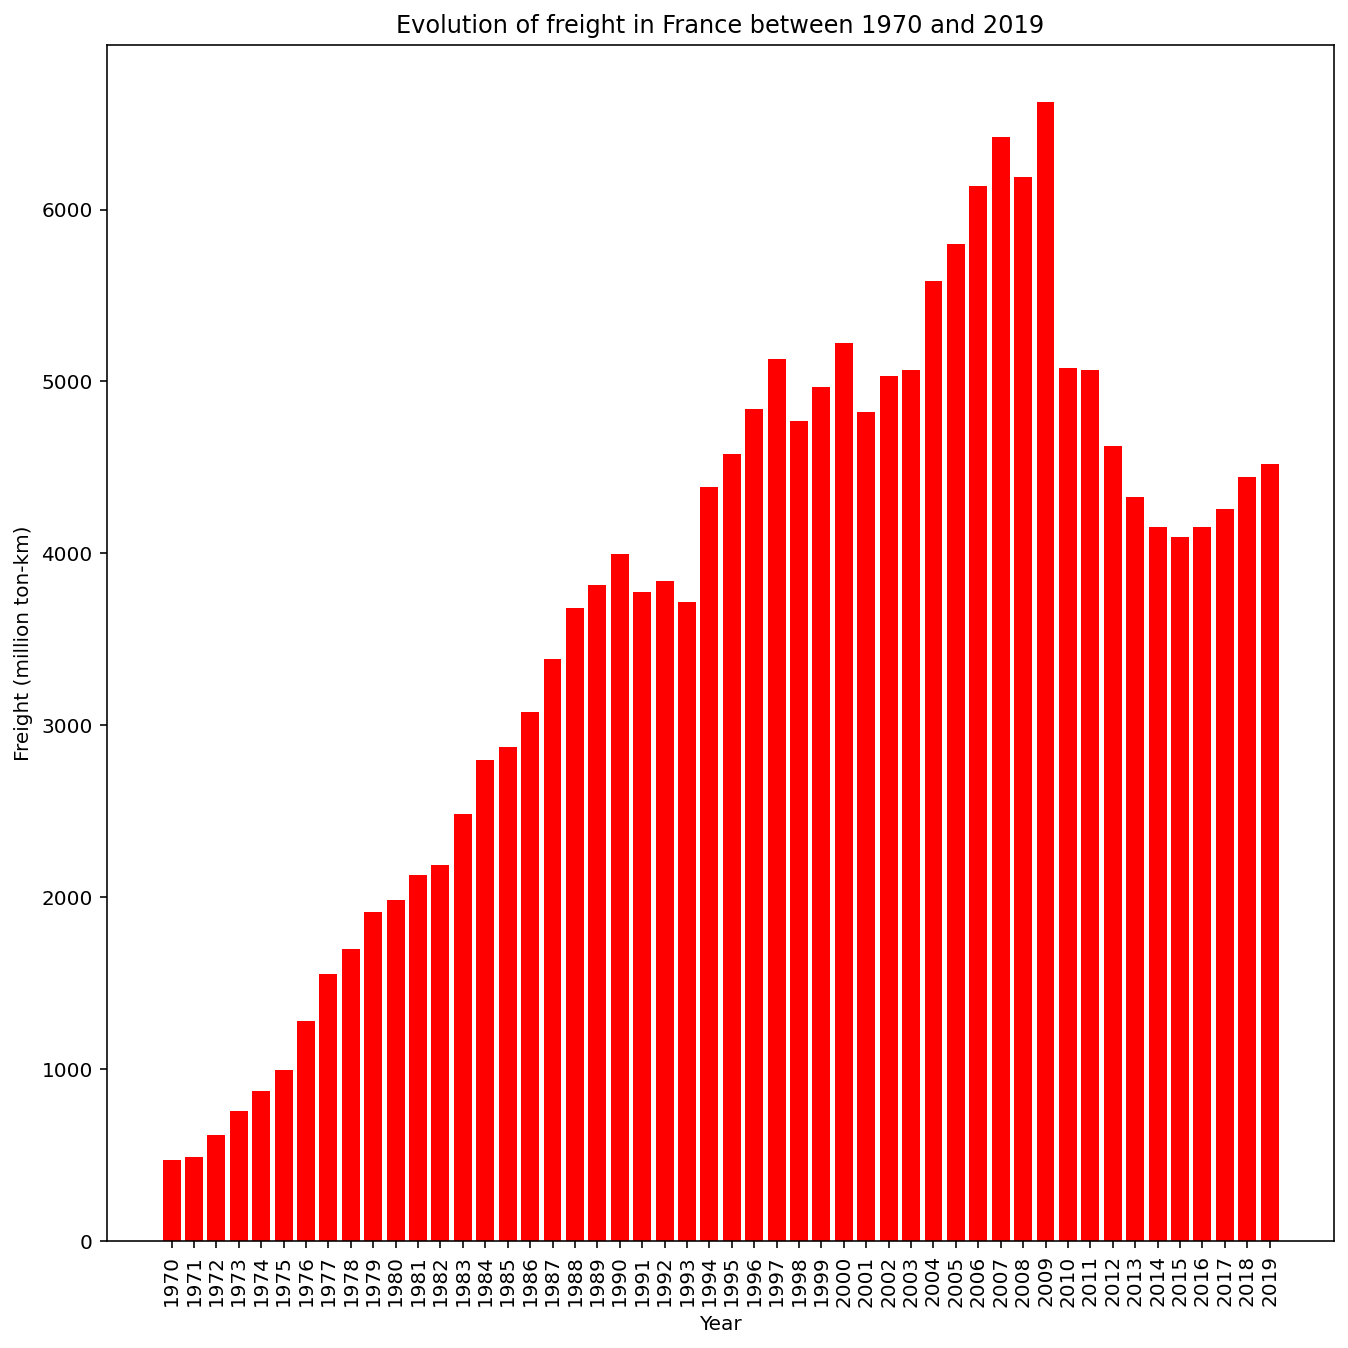

In [110]:
freight = df_freight.filter(df_freight.Country == 'France').select(df_freight.columns[14:64]).collect()[0].asDict().values()

matplotlib.pyplot.gcf().set_size_inches(11, 11)
matplotlib.pyplot.title('Evolution of freight in France between 1970 and 2019')
matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('Freight (million ton-km)')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(years, freight, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Fret/France.png')

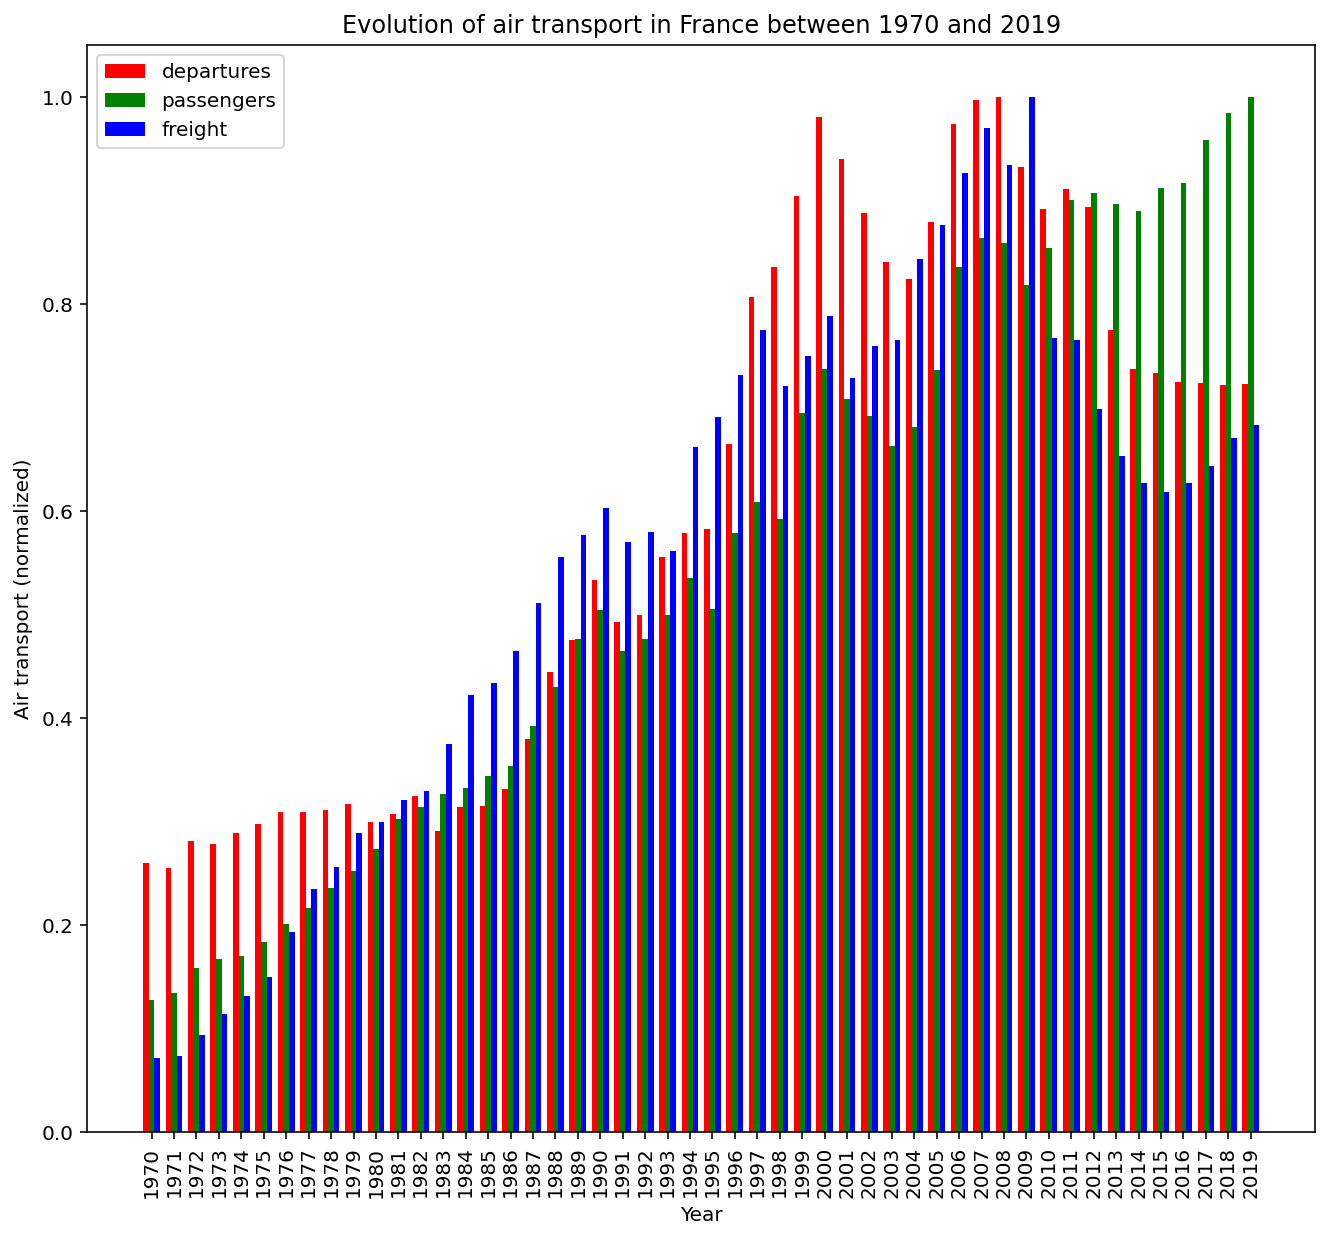

In [109]:
x = numpy.arange(len(years))
departures = numpy.array(list(departures)).astype('float64')
passengers = numpy.array(list(passengers)).astype('float64')
freight = numpy.array(list(freight)).astype('float64')

departures /= numpy.max(departures)
passengers /= numpy.max(passengers)
freight /= numpy.max(freight)

matplotlib.pyplot.gcf().set_size_inches(11, 11)
matplotlib.pyplot.title('Evolution of air transport in France between 1970 and 2019')
matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('Air transport (normalized)')
matplotlib.pyplot.xticks(rotation = 'vertical')

matplotlib.pyplot.gca().set_xticks(x)
matplotlib.pyplot.gca().set_xticklabels(years)

width = 1. / 4

matplotlib.pyplot.bar(x - width, departures, width, color = 'r', label = 'departures')
matplotlib.pyplot.bar(x, passengers, width, color = 'g', label = 'passengers')
matplotlib.pyplot.bar(x + width, freight, width, color = 'b', label = 'freight')

matplotlib.pyplot.legend(loc = 2)

matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/France.png')

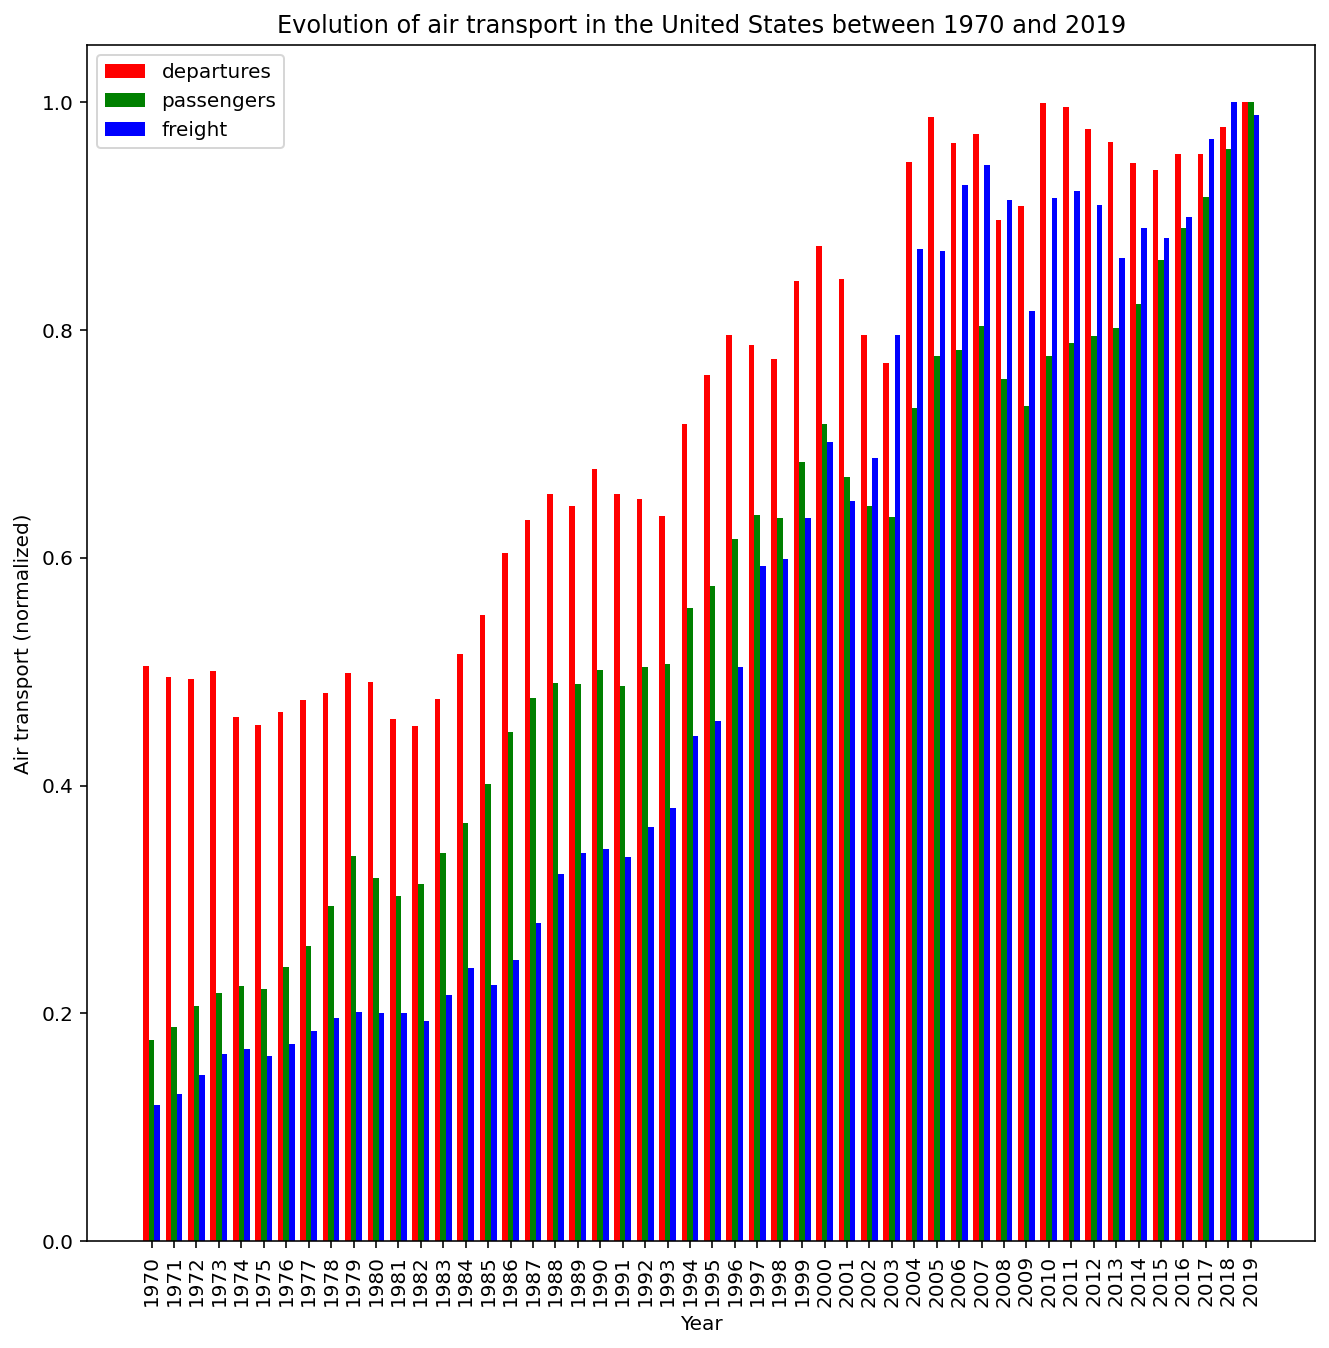

In [113]:
x = numpy.arange(len(years))
departures = numpy.array(list(df_departures.filter(df_departures.Country == 'United States').select(df_departures.columns[14:64]).collect()[0].asDict().values())).astype('float64')
passengers = numpy.array(list(df_passengers.filter(df_passengers.Country == 'United States').select(df_passengers.columns[14:64]).collect()[0].asDict().values())).astype('float64')
freight = numpy.array(list(df_freight.filter(df_freight.Country == 'United States').select(df_freight.columns[14:64]).collect()[0].asDict().values())).astype('float64')

departures /= numpy.max(departures)
passengers /= numpy.max(passengers)
freight /= numpy.max(freight)

matplotlib.pyplot.gcf().set_size_inches(11, 11)
matplotlib.pyplot.title('Evolution of air transport in the United States between 1970 and 2019')
matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('Air transport (normalized)')
matplotlib.pyplot.xticks(rotation = 'vertical')

matplotlib.pyplot.gca().set_xticks(x)
matplotlib.pyplot.gca().set_xticklabels(years)

width = 1. / 4

matplotlib.pyplot.bar(x - width, departures, width, color = 'r', label = 'departures')
matplotlib.pyplot.bar(x, passengers, width, color = 'g', label = 'passengers')
matplotlib.pyplot.bar(x + width, freight, width, color = 'b', label = 'freight')

matplotlib.pyplot.legend(loc = 2)

matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/États-Unis.png')

In [10]:
df_departures.select(df_departures.Country, '2019', df_departures.Minimum, df_departures.Maximum, df_departures.Total, df_departures.Average).show()

+--------------------+-------+-------+-------+--------+------------------+
|             Country|   2019|Minimum|Maximum|   Total|           Average|
+--------------------+-------+-------+-------+--------+------------------+
|               Aruba|      0|      0|   2276|    6684|109.57377049180327|
|         Afghanistan|   7334|      0|  25920|  382715| 6274.016393442623|
|              Angola|  13647|      0|  22400|  428108| 7018.163934426229|
|             Albania|   2558|      0|  11196|  113924|1867.6065573770493|
|             Andorra|      0|      0|      0|       0|               0.0|
|          Arab World|1522487|      0|1539592|29486263| 483381.3606557377|
|United Arab Emirates| 425667|      0| 463947| 5168620| 84731.47540983607|
|           Argentina| 163106|      0| 183600| 5607533| 91926.77049180328|
|             Armenia|   2133|      0|   8761|   98935|1621.8852459016393|
|      American Samoa|      0|      0|   9144|   37828| 620.1311475409836|
| Antigua and Barbuda|  2

In [11]:
df_passengers.select(df_passengers.Country, '2019', df_passengers.Minimum, df_passengers.Maximum, df_passengers.Total, df_passengers.Average).show()

+--------------------+---------+-------+---------+----------+--------------------+
|             Country|     2019|Minimum|  Maximum|     Total|             Average|
+--------------------+---------+-------+---------+----------+--------------------+
|               Aruba|        0|      0|   274280|    772062|  12656.754098360656|
|         Afghanistan|  1066747|      0|  2279341|  25117062|  411755.11475409835|
|              Angola|  1436959|      0|  1516628|  30439562|   499009.2131147541|
|             Albania|   307741|      0|   865848|   7238559|  118664.90163934426|
|             Andorra|        0|      0|        0|         0|                 0.0|
|          Arab World|235289347|      0|235289347|3404815579|5.5816648836065575E7|
|United Arab Emirates| 92798725|      0| 95758342| 982803657|1.6111535360655738E7|
|           Argentina| 19461377|      0| 19461377| 368336464|    6038302.68852459|
|             Armenia|   193668|      0|   704753|   8843682|  144978.39344262294|
|   

In [12]:
df_freight.select(df_freight.Country, '2019', df_freight.Minimum, df_freight.Maximum, df_freight.Total, df_freight.Average).show()

+--------------------+-----+-------+-------+------+------------------+
|             Country| 2019|Minimum|Maximum| Total|           Average|
+--------------------+-----+-------+-------+------+------------------+
|               Aruba|    0|      0|      0|     0|               0.0|
|         Afghanistan|   20|      0|    116|  1061| 17.39344262295082|
|              Angola|   68|      0|     80|  2131|  34.9344262295082|
|             Albania|    0|      0|      0|     0|               0.0|
|             Andorra|    0|      0|      0|     0|               0.0|
|          Arab World|30599|      0|  31869|404373| 6629.065573770492|
|United Arab Emirates|14762|      0|  16616|210737|3454.7049180327867|
|           Argentina|  280|      0|    311|  9075| 148.7704918032787|
|             Armenia|    0|      0|     11|   129|2.1147540983606556|
|      American Samoa|    0|      0|      0|     0|               0.0|
| Antigua and Barbuda|    0|      0|      0|     0|               0.0|
|     

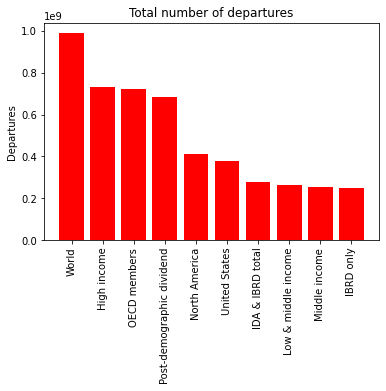

In [29]:
countries = df_departures.orderBy(df_departures.Total.desc()).select(df_departures.Country).limit(10).collect()
totals = df_departures.orderBy(df_departures.Total.desc()).select(df_departures.Total).limit(10).collect()
countries = [country['Country'] for country in countries]
totals = [total['Total'] for total in totals]

matplotlib.pyplot.title('Total number of departures')
matplotlib.pyplot.ylabel('Departures')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(countries, totals, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Départs/Total.png')

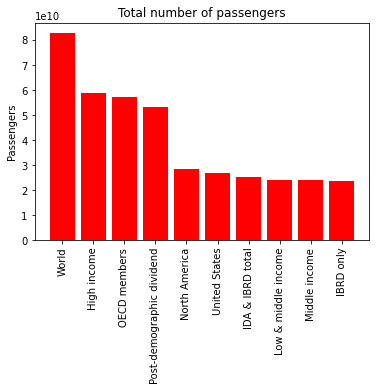

In [14]:
countries = df_passengers.orderBy(df_passengers.Total.desc()).select(df_passengers.Country).limit(10).collect()
totals = df_passengers.orderBy(df_passengers.Total.desc()).select(df_passengers.Total).limit(10).collect()
countries = [country['Country'] for country in countries]
totals = [total['Total'] for total in totals]

matplotlib.pyplot.title('Total number of passengers')
matplotlib.pyplot.ylabel('Passengers')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(countries, totals, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Passagers/Total.png')

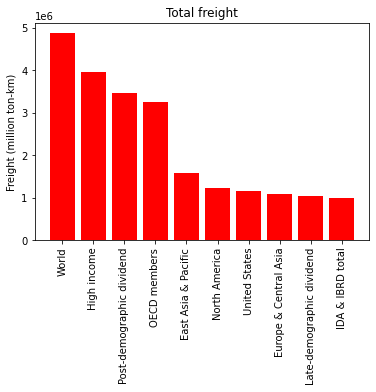

In [16]:
countries = df_freight.orderBy(df_freight.Total.desc()).select(df_freight.Country).limit(10).collect()
totals = df_freight.orderBy(df_freight.Total.desc()).select(df_freight.Total).limit(10).collect()
countries = [country['Country'] for country in countries]
totals = [total['Total'] for total in totals]

matplotlib.pyplot.title('Total freight')
matplotlib.pyplot.ylabel('Freight (million ton-km)')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(countries, totals, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Fret/Total.png')

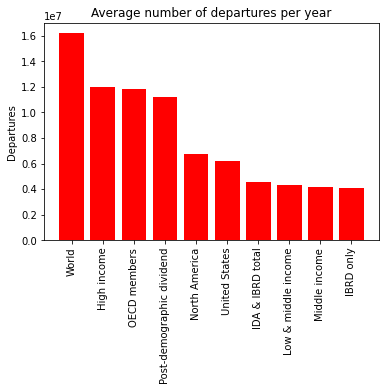

In [17]:
countries = df_departures.orderBy(df_departures.Average.desc()).select(df_departures.Country).limit(10).collect()
means = df_departures.orderBy(df_departures.Average.desc()).select(df_departures.Average).limit(10).collect()
countries = [country['Country'] for country in countries]
means = [mean['Average'] for mean in means]

matplotlib.pyplot.title('Average number of departures per year')
matplotlib.pyplot.ylabel('Departures')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(countries, means, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Départs/Moyen.png')

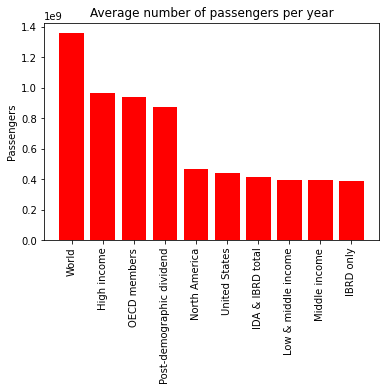

In [137]:
countries = df_passengers.orderBy(df_passengers.Average.desc()).select(df_passengers.Country).limit(10).collect()
means = df_passengers.orderBy(df_passengers.Average.desc()).select(df_passengers.Average).limit(10).collect()
countries = [country['Country'] for country in countries]
means = [mean['Average'] for mean in means]

matplotlib.pyplot.title('Average number of passengers per year')
matplotlib.pyplot.ylabel('Passengers')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(countries, means, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Passagers/Moyen.png')

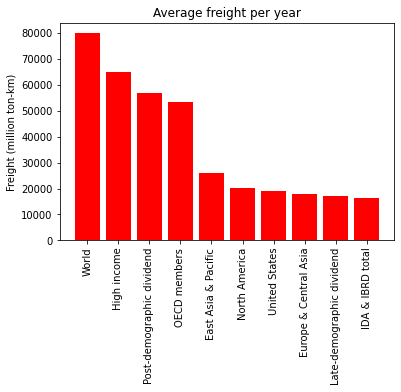

In [18]:
countries = df_freight.orderBy(df_freight.Average.desc()).select(df_freight.Country).limit(10).collect()
means = df_freight.orderBy(df_freight.Average.desc()).select(df_freight.Average).limit(10).collect()
countries = [country['Country'] for country in countries]
means = [mean['Average'] for mean in means]

matplotlib.pyplot.title('Average freight per year')
matplotlib.pyplot.ylabel('Freight (million ton-km)')
matplotlib.pyplot.xticks(rotation = 'vertical')
matplotlib.pyplot.bar(countries, means, color = 'r')
matplotlib.pyplot.show()
matplotlib.pyplot.savefig('Images/Fret/Moyen.png')